In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel('data/test_sample.xlsx')

In [3]:
df.head()

,rep_date,tsag_CreatedOnTime,TSAction,sales_channel,traf_cat_big,traf_cat_small,traf_cat_type,page_reached_CRM,up_stage,mid_stage,page_status,rejection_group,sub_stage,is_completed,is_success,is_approved,is_verificated,funnel_component
0,2022-05-17,2022-05-17 09:11:06.358,20,Mobile,Organic,Google Play,Free,Application Summary,Application Summary,Left on Application Summary,Left page,Not rejected,z\ no data,1,1,1,1,1-TR
1,2022-05-17,2022-05-17 15:10:07.375,17,Mobile,Contextual,Google Play,Paid,NaN,e-Sign,Disbursed,Completed page,Not rejected,Disbursed,1,1,1,1,Disbursed
2,2022-05-17,2022-05-17 19:08:06.054,7,Mobile,Affiliate,Cashtap_int,Paid,Bank Verification,NaN,NaN,NaN,Rejected,Exists Active Bank Account,0,0,0,0,1-CR
3,2022-05-17,2022-05-17 12:52:24.080,7,Mobile,Organic,Vivo store,Free,Bank Verification,Bank Verification,Rejected on Call 1,Left page,Rejected,Active moratorium,1,0,0,0,1-AR
4,2022-05-17,2022-05-17 23:00:35.315,3,Mobile,Affiliate,HiCredit,Paid,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,1-CR


In [37]:
df_complete = df.groupby('rep_date').is_completed.agg('sum').reset_index()

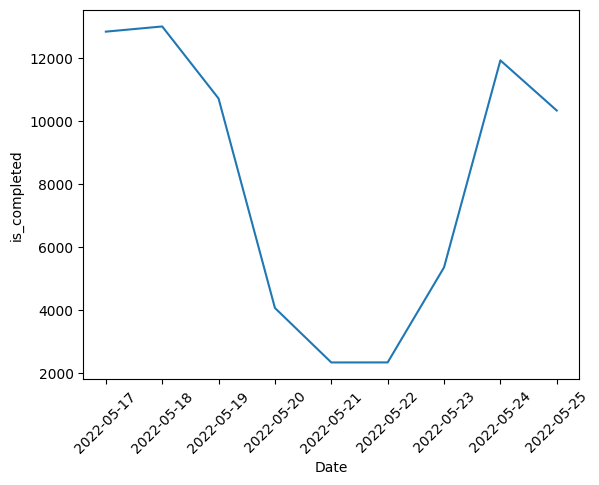

In [105]:
plt.plot(df_complete.rep_date, df_complete.is_completed)
plt.xlabel('Date')
plt.ylabel('is_completed')
plt.xticks(rotation=45);

In [32]:
df.traf_cat_type.unique()

array(['Free', 'Paid', 'z\\ no info'], dtype=object)

In [48]:
mapping = dict()
for i, el in enumerate(df.traf_cat_type.unique()):
    mapping[el] = i

mapping

{'Free': 0, 'Paid': 1, 'z\\ no info': 2}

In [49]:
df['traf_cat_type_new'] = df['traf_cat_type'].map(mapping)

(array([11145.,     0.,  4546.,     0.,     0., 48650.,     0., 53740.,
            0.,  3502.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

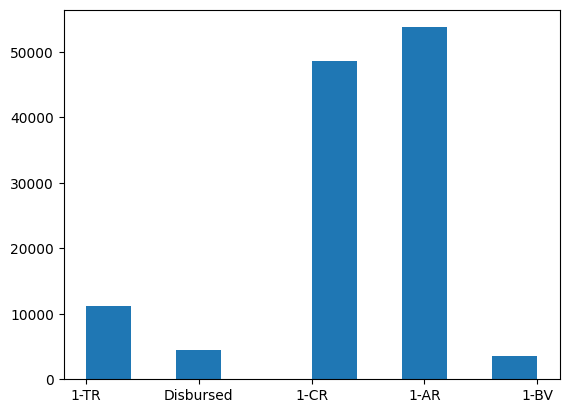

In [101]:
plt.hist(df.funnel_component)

In [84]:
def encoded(column_name: str)->pd.DataFrame:
    X = df[column_name].values.reshape(-1, 1)

    # Initialize and fit the OneHotEncoder
    encoder = OneHotEncoder()
    encoder.fit(X)
    
    # Transform the column
    encoded_column = encoder.transform(X).toarray()
    
    # Create a new DataFrame with the encoded column
    encoded_df = pd.DataFrame(encoded_column, columns=encoder.categories_[0])
    
    # Concatenate the new DataFrame with the original DataFrame
    df_encoded = pd.concat([df, encoded_df], axis=1)
    return df_encoded.groupby('rep_date')[encoder.categories_[0]].agg('sum')

In [85]:
df_encoded = encoded('traf_cat_type')

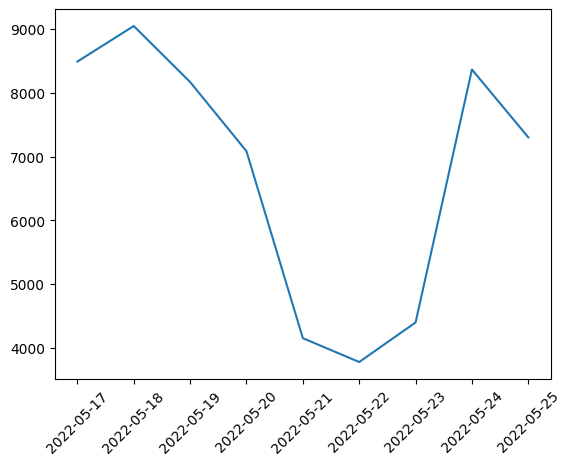

In [86]:
plt.plot(df_encoded.Free)
plt.xticks(rotation=45);

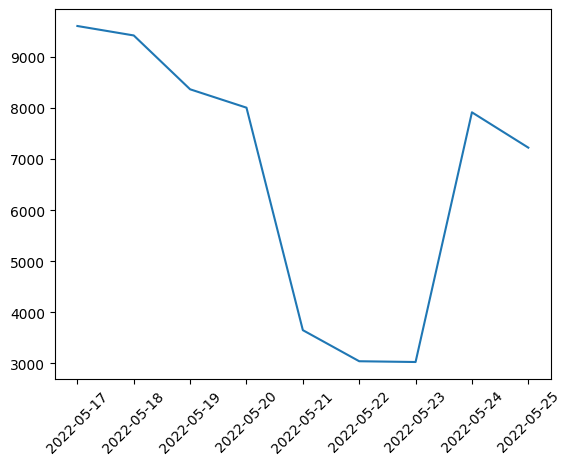

In [87]:
plt.plot(df_encoded.Paid)
plt.xticks(rotation=45);

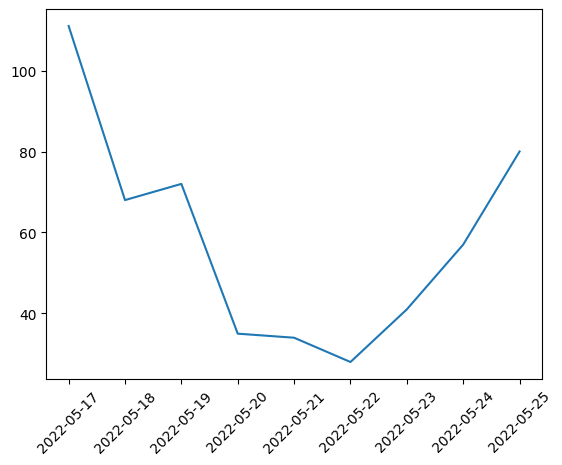

In [88]:
plt.plot(df_encoded['z\ no info'])
plt.xticks(rotation=45);

In [89]:
df_encoded = encoded('traf_cat_big')

In [90]:
df_encoded.head()

,Affiliate,Communication,Contextual,Organic,Social Paid,z\ no info
rep_date,,,,,,
2022-05-17,8717.0,36.0,850.0,8496.0,1.0,111.0
2022-05-18,8579.0,65.0,777.0,9049.0,3.0,68.0
2022-05-19,7510.0,70.0,779.0,8178.0,2.0,72.0
2022-05-20,7298.0,61.0,647.0,7086.0,1.0,35.0
2022-05-21,2951.0,20.0,676.0,4152.0,1.0,34.0


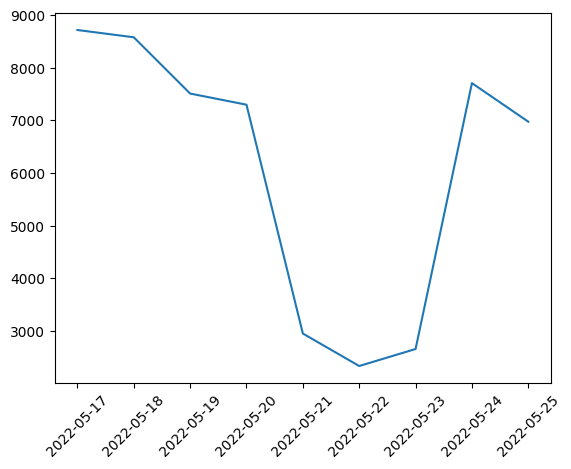

In [91]:
plt.plot(df_encoded['Affiliate'])
plt.xticks(rotation=45);

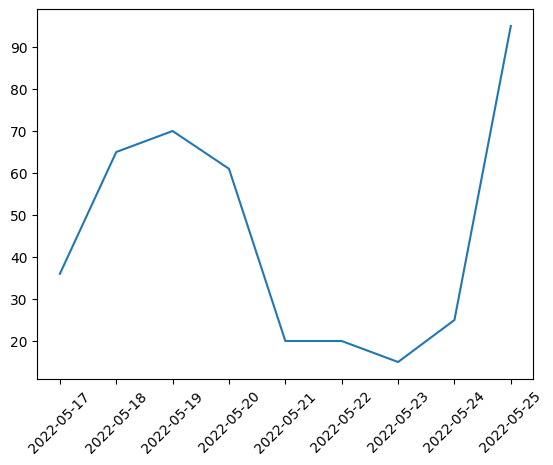

In [92]:
plt.plot(df_encoded['Communication'])
plt.xticks(rotation=45);

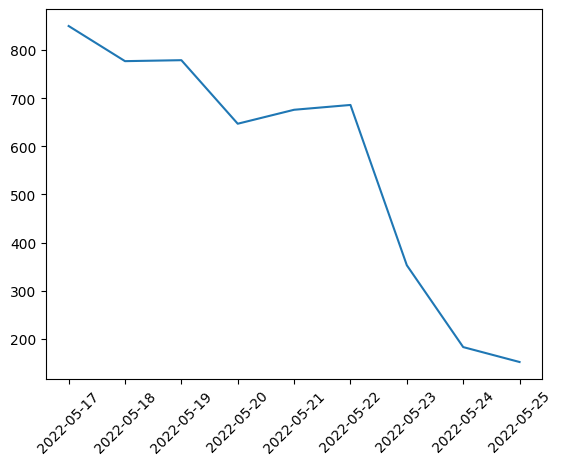

In [93]:
plt.plot(df_encoded['Contextual'])
plt.xticks(rotation=45);

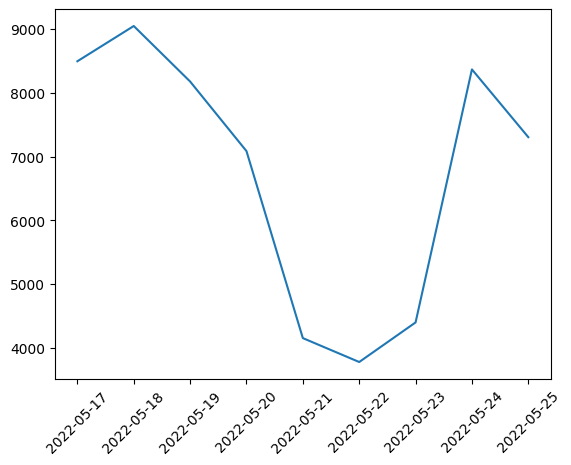

In [96]:
plt.plot(df_encoded['Organic'])
plt.xticks(rotation=45);

In [102]:
df_encoded = encoded('rejection_group')

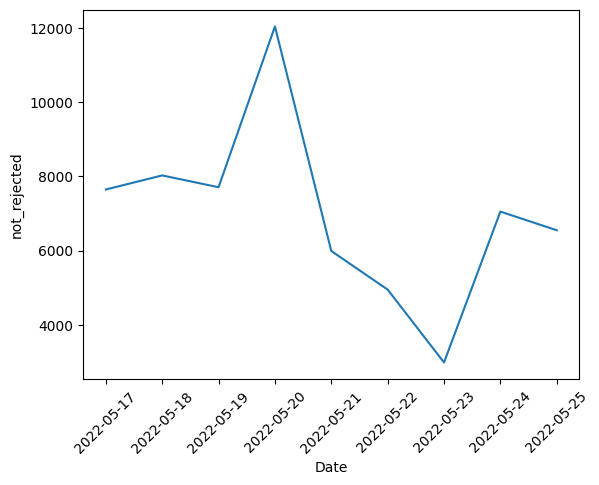

In [108]:
plt.plot(df_encoded['Not rejected'])
plt.ylabel('not_rejected')
plt.xlabel('Date')
plt.xticks(rotation=45);